# JupyterHEPD: новый интерактивый сервис для разработки и обмена исследовательскими данными

## Что такое Jupyter?

**Jupyter** — это проект с открытым исходным кодом, платформа, которая помогает максимально просто получить собственную web-среду разработки, не задумываясь о локальных пакетах и развертывании. С помощью Jupyter можно не только осуществлять обработку данных, но и делиться результатами с другими

### Пример

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

"Hello world"

'Hello world'

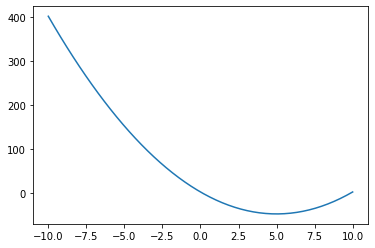

In [9]:
def polynom(x):
    return 2 * x**2 - 20 * x + 2

X = np.linspace(-10, 10)
Y = polynom(X)
plt.plot(X, Y)

In [10]:
from ipywidgets import interact, FloatSlider

def parabolic(offset):
    X = np.linspace(-10, 10)
    Y = polynom(X-offset)
    # use same y scale for all offsets
    plt.gca().set_ylim([-100, 500])
    plt.plot(X, Y);
    
interact(parabolic, offset=FloatSlider(min=-10., max=10., step=0.25))

interactive(children=(FloatSlider(value=0.0, description='offset', max=10.0, min=-10.0, step=0.25), Output()),…

<function __main__.parabolic(offset)>

# The end